In [3]:
# Read in the CSV into a Pandas DataFrame

import pandas as pd

df = pd.read_csv('../DATA/housing.csv')
df = df.dropna()

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20433, 10)

In [104]:
df = df.sample(frac=1,random_state=2)
train_df = df[:17000]
train_df = train_df.reset_index(drop=True)
test_df = df[17000:]
test_df = test_df.reset_index(drop=True)

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.75,46.0,954.0,161.0,429.0,154.0,2.9250,142900.0,NEAR BAY
1,-121.27,38.13,52.0,1081.0,257.0,437.0,225.0,2.1979,114100.0,INLAND
2,-122.41,37.60,26.0,2754.0,402.0,1128.0,395.0,6.3719,466900.0,NEAR OCEAN
3,-117.05,32.68,19.0,1469.0,275.0,1010.0,292.0,3.5664,150400.0,NEAR OCEAN
4,-121.36,38.40,18.0,4813.0,849.0,2333.0,843.0,4.1750,144400.0,INLAND


In [6]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.07,33.87,28.0,2399.0,436.0,1613.0,429.0,3.6339,220100.0,<1H OCEAN
1,-118.26,34.02,40.0,1259.0,362.0,1499.0,327.0,1.8382,126400.0,<1H OCEAN
2,-118.51,34.16,23.0,11154.0,1995.0,4076.0,1809.0,5.4609,500001.0,<1H OCEAN
3,-120.04,36.95,36.0,1528.0,347.0,1334.0,304.0,1.3594,48300.0,INLAND
4,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074,181300.0,<1H OCEAN


In [7]:
y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape

((17000,), (3433,))

In [8]:
#Error for Baseline model

from sklearn.metrics import mean_absolute_error

average_median_house_value = train_df['median_house_value'].mean()
baseline_model_test_predictions = [average_median_house_value] * len(test_df)

mean_absolute_error(baseline_model_test_predictions, y_test)

90952.86688447764

## 1. Dimentionality Reduction(PCA)

In [10]:
#Observing the correlation between the total_rooms,total_bedrooms and households

train_df[['total_rooms','total_bedrooms','households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.931023,0.918161
total_bedrooms,0.931023,1.000000,0.979402
households,0.918161,0.979402,1.000000


In [12]:
import numpy as np

X_train_3 = train_df[['total_rooms','total_bedrooms','households']]

X_train_3.shape

(17000, 3)

In [13]:
X_test_3 = test_df[['total_rooms','total_bedrooms','households']]

X_test_3.shape

(3433, 3)

In [18]:
#Getting error of Random forest training on using X_train_3,X_test_3 against Y

from sklearn.ensemble import RandomForestRegressor

forest_base = RandomForestRegressor(n_estimators=50,max_depth=5).fit(X_train_3,y_train)
forest_base_test_predictions = forest_base.predict(X_test_3)
mean_absolute_error(y_test,forest_base_test_predictions)

82165.00622766644

In [20]:
# Train PCA with 2 Feature output from X_train_3's 3 Features

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X_train_3)

pca

PCA(n_components=2)

In [21]:
X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

X_test_pca.shape, X_train_pca.shape

((3433, 2), (17000, 2))

In [22]:
forest_pca = RandomForestRegressor(n_estimators=50,max_depth=5).fit(X_train_pca,y_train)
forest_pca_test_predictions = forest_pca.predict(X_test_pca)
mean_absolute_error(y_test,forest_pca_test_predictions)

79427.2261176727

## 2. Preprocessing / Scaling

In [23]:
X_train_3

,total_rooms,total_bedrooms,households
0,2781.0,574.0,519.0
1,1233.0,214.0,199.0
2,4166.0,756.0,743.0
3,1632.0,492.0,429.0
4,1613.0,335.0,342.0
...,...,...,...
16995,1332.0,368.0,295.0
16996,1437.0,268.0,144.0
16997,1895.0,424.0,417.0
16998,3354.0,659.0,648.0


In [24]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

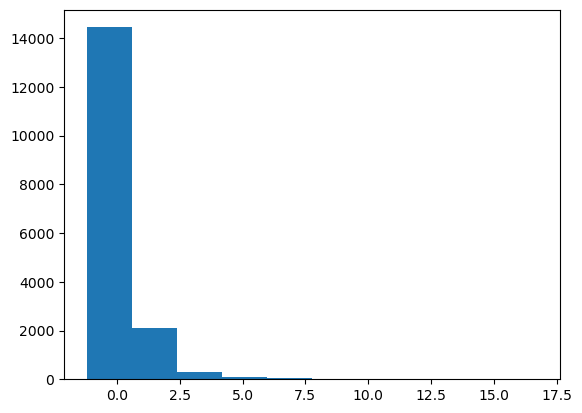

In [26]:
# Scaling X_train_3 by Z-score normalization

scaler = StandardScaler().fit(X_train_3)
X_train_scaled = scaler.transform(X_train_3)

plt.hist(X_train_scaled[:,0])
plt.show()

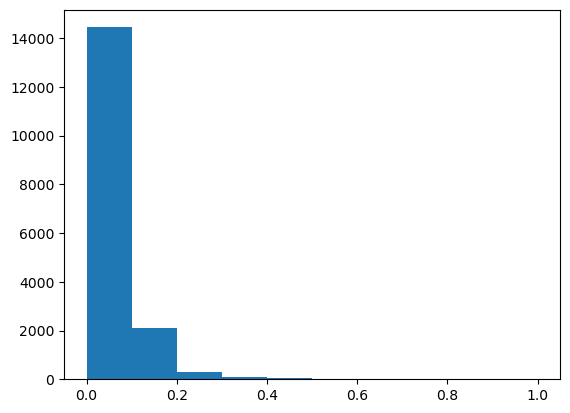

In [31]:
# Scaling X_train_3 by Min-Max method

ScalerMM = MinMaxScaler().fit(X_train_3)
X_train_scaled2 = ScalerMM.transform(X_train_3)

plt.hist(X_train_scaled2[:,0])
plt.show()

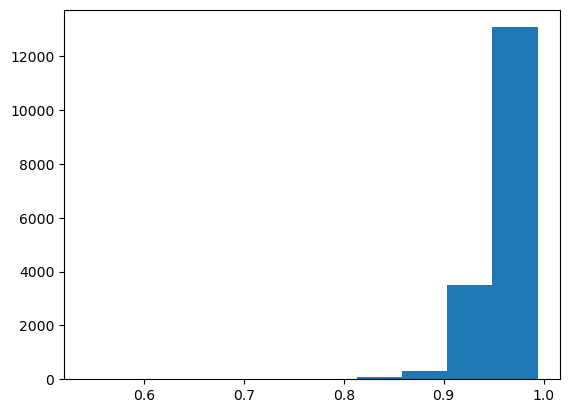

In [33]:
ScalerNorm = Normalizer().fit(X_train_3)
X_train_scaled3 = ScalerNorm.transform(X_train_3)

plt.hist(X_train_scaled3[:,0])
plt.show()

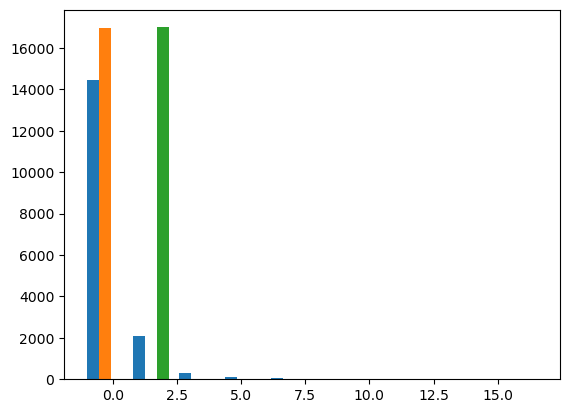

In [38]:
#Comparing the three Normalized values

plt.hist([X_train_scaled[:,0],X_train_scaled2[:,0],X_train_scaled3[:,0]])
plt.show()

In [39]:
# Preprocess X_test_3

X_test_3_scaled = scaler.transform(X_test_3)

X_test_3_scaled.shape

(3433, 3)

In [41]:
# Get error of Random Forest training on (X_train_scaled, y_train) and testing on (X_test_scaled, y_test)

random_forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_scaled, y_train)
random_forest_scaled_test_predictions = random_forest_scaled.predict(X_test_3_scaled)

mean_absolute_error(y_test, random_forest_scaled_test_predictions)

82291.30648975263

In [60]:
#Creating a PIPELINE: Scaling -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

scale_pca_forest = Pipeline(steps=[('Scaler',StandardScaler()),
                                    ('PCA',PCA(n_components=2)),
                                    ('Forest',RandomForestRegressor(n_estimators=50,max_depth=5))])

scale_pca_forest

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [61]:
# Mean Absolute error of the Pipeline

scale_pca_forest.fit(X_train_3, y_train)
pipeline_test_predictions = scale_pca_forest.predict(X_test_3)

mean_absolute_error(y_test,pipeline_test_predictions)

80161.99036728061

In [62]:
# We try Normalizer for a better result

#Creating a PIPELINE: Normalizer -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

Normalize_pca_forest = Pipeline(steps=[('Normalizer',Normalizer()),
                                    ('PCA',PCA(n_components=2)),
                                    ('Forest',RandomForestRegressor(n_estimators=50,max_depth=5))])

Normalize_pca_forest

Pipeline(steps=[('Normalizer', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [64]:
# Mean Absolute error of the Pipeline

Normalize_pca_forest.fit(X_train_3, y_train)
pipeline_test_predictions = Normalize_pca_forest.predict(X_test_3)

mean_absolute_error(y_test,pipeline_test_predictions)

77403.44644063938

## 3. Categorical Encoding (Dummy / One-Hot)

In [70]:
# Our Categorical data

train_df['ocean_proximity'].unique()

array(['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [71]:
train_dummies = pd.get_dummies(train_df['ocean_proximity'])
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [105]:
train_df = pd.concat([train_df,train_dummies],axis=1)

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.75,46.0,954.0,161.0,429.0,154.0,2.9250,142900.0,NEAR BAY,0,0,0,1,0
1,-121.27,38.13,52.0,1081.0,257.0,437.0,225.0,2.1979,114100.0,INLAND,0,1,0,0,0
2,-122.41,37.60,26.0,2754.0,402.0,1128.0,395.0,6.3719,466900.0,NEAR OCEAN,1,0,0,0,0
3,-117.05,32.68,19.0,1469.0,275.0,1010.0,292.0,3.5664,150400.0,NEAR OCEAN,0,0,0,1,0
4,-121.36,38.40,18.0,4813.0,849.0,2333.0,843.0,4.1750,144400.0,INLAND,0,1,0,0,0


In [77]:
# Frequency per category

train_df['ocean_proximity'].value_counts()

<1H OCEAN     7522
INLAND        5408
NEAR OCEAN    2172
NEAR BAY      1895
ISLAND           3
Name: ocean_proximity, dtype: int64

In [106]:
# Drop ISLAND dummy since there are few of them

train_df.drop('ISLAND', inplace=True,axis=1)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.75,46.0,954.0,161.0,429.0,154.0,2.9250,142900.0,NEAR BAY,0,0,1,0
1,-121.27,38.13,52.0,1081.0,257.0,437.0,225.0,2.1979,114100.0,INLAND,0,1,0,0
2,-122.41,37.60,26.0,2754.0,402.0,1128.0,395.0,6.3719,466900.0,NEAR OCEAN,1,0,0,0
3,-117.05,32.68,19.0,1469.0,275.0,1010.0,292.0,3.5664,150400.0,NEAR OCEAN,0,0,1,0
4,-121.36,38.40,18.0,4813.0,849.0,2333.0,843.0,4.1750,144400.0,INLAND,0,1,0,0


In [80]:
test_dummies = pd.get_dummies(test_df['ocean_proximity'])
test_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [81]:
test_dummies.drop('ISLAND',inplace=True,axis=1)
test_dummies.head()

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [107]:
test_df = pd.concat([test_df,test_dummies],axis=1)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-121.65,37.12,14.0,4721.0,999.0,2648.0,888.0,3.6895,239300.0,<1H OCEAN,1,0,0,0
1,-118.16,34.02,41.0,1256.0,391.0,1511.0,381.0,1.7981,166000.0,<1H OCEAN,1,0,0,0
2,-122.19,37.44,39.0,4402.0,618.0,1616.0,631.0,8.9955,500001.0,NEAR OCEAN,1,0,0,0
3,-118.36,34.03,38.0,2365.0,638.0,2259.0,607.0,2.0879,120700.0,<1H OCEAN,0,1,0,0
4,-117.27,33.18,4.0,3371.0,773.0,1481.0,627.0,2.9133,215700.0,NEAR OCEAN,1,0,0,0


In [109]:
X_train_dummies = train_df.to_numpy()[:,-4:]
X_train_dummies.shape

(17000, 4)

In [100]:
X_test_dummies = test_df.to_numpy()[:,-4:]
X_test_dummies.shape

(3433, 4)

In [110]:
# Making a Linear Regression model and Checking Error

from sklearn.linear_model import LinearRegression

lineardummy = LinearRegression().fit(X_train_dummies,y_train)
lineardummy_test_prediction = lineardummy.predict(X_test_dummies)

mean_absolute_error(y_test,lineardummy_test_prediction)

77095.02893348427

## 4. Binning (Grouping, Aggregating)

<Axes: >

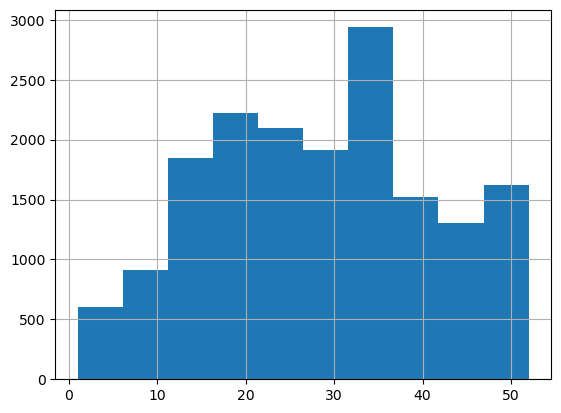

In [111]:
train_df['housing_median_age'].hist()

In [112]:
train_df['housing_age_less_than_30'] = (train_df['housing_median_age'] < 30).astype(int)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,housing_age_less_than_30
0,-122.16,37.75,46.0,954.0,161.0,429.0,154.0,2.9250,142900.0,NEAR BAY,0,0,1,0,0
1,-121.27,38.13,52.0,1081.0,257.0,437.0,225.0,2.1979,114100.0,INLAND,0,1,0,0,0
2,-122.41,37.60,26.0,2754.0,402.0,1128.0,395.0,6.3719,466900.0,NEAR OCEAN,1,0,0,0,1
3,-117.05,32.68,19.0,1469.0,275.0,1010.0,292.0,3.5664,150400.0,NEAR OCEAN,0,0,1,0,1
4,-121.36,38.40,18.0,4813.0,849.0,2333.0,843.0,4.1750,144400.0,INLAND,0,1,0,0,1


In [113]:
test_df['housing_age_less_than_30'] = (test_df['housing_median_age'] < 30).astype(int)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,housing_age_less_than_30
0,-121.65,37.12,14.0,4721.0,999.0,2648.0,888.0,3.6895,239300.0,<1H OCEAN,1,0,0,0,1
1,-118.16,34.02,41.0,1256.0,391.0,1511.0,381.0,1.7981,166000.0,<1H OCEAN,1,0,0,0,0
2,-122.19,37.44,39.0,4402.0,618.0,1616.0,631.0,8.9955,500001.0,NEAR OCEAN,1,0,0,0,0
3,-118.36,34.03,38.0,2365.0,638.0,2259.0,607.0,2.0879,120700.0,<1H OCEAN,0,1,0,0,0
4,-117.27,33.18,4.0,3371.0,773.0,1481.0,627.0,2.9133,215700.0,NEAR OCEAN,1,0,0,0,1


In [114]:
X_train_median_age = train_df['housing_age_less_than_30'].to_numpy().reshape(-1,1)
X_train_median_age.shape

(17000, 1)

In [115]:
X_test_median_age = test_df['housing_age_less_than_30'].to_numpy().reshape(-1,1)
X_test_median_age.shape

(3433, 1)

In [116]:
from sklearn.linear_model import LinearRegression

linear_binned = LinearRegression().fit(X_train_median_age,y_train)
linear_binned_prediction = linear_binned.predict(X_test_median_age)

mean_absolute_error(y_test,linear_binned_prediction)

90964.4309877513

## 5. Clustering

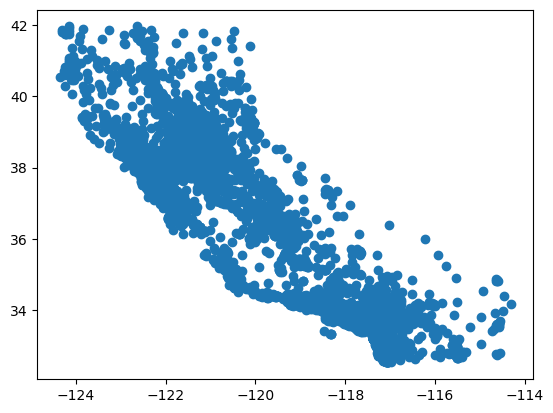

In [120]:
#Plotting California's Map

plt.scatter(train_df['longitude'],train_df['latitude'])
plt.show()

In [122]:
X_train_lat_long = train_df[['latitude','longitude']].to_numpy()
X_train_lat_long.shape

(17000, 2)

In [153]:
# KMeans model from longitude and latitude and get Clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7).fit(X_train_lat_long)
kmeans.labels_

/Users/amenhasfaw/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 4, 1, ..., 3, 1, 5], dtype=int32)

In [154]:
import plotly.express as px

px.scatter(x=train_df['longitude'],y=train_df['latitude'],color=kmeans.labels_)

In [155]:
X_train_clusters = pd.get_dummies(kmeans.labels_).to_numpy()
X_train_clusters.shape

(17000, 7)

In [156]:
X_test_lat_long = test_df[['latitude','longitude']].to_numpy()
X_test_clusters = pd.get_dummies(kmeans.predict(X_test_lat_long)).to_numpy()
X_test_clusters.shape

(3433, 7)

In [157]:
# Check error of linear model that only uses the cluster one-hot encodings

linear_clustering = LinearRegression().fit(X_train_clusters, y_train)
linear_clustering_test_predictions = linear_clustering.predict(X_test_clusters)
mean_absolute_error(linear_clustering_test_predictions, y_test)

91012.71890474804

## 6. Feature Selection

In [158]:
# Observe shapes of X_train_clustering, X_train_scaled and dummy_X_train

X_train_clusters.shape,X_train_dummies.shape,X_train_scaled.shape

((17000, 7), (17000, 4), (17000, 3))

In [160]:
X_train_all = np.concatenate([X_train_clusters,X_train_dummies,X_train_scaled],axis=1)
X_train_all.shape

(17000, 14)

In [162]:
X_test_clusters.shape,X_test_dummies.shape,X_test_3_scaled.shape

((3433, 7), (3433, 4), (3433, 3))

In [163]:
X_test_all = np.concatenate([X_test_clusters,X_test_dummies,X_test_3_scaled],axis=1)
X_test_all.shape

(3433, 14)

In [164]:
# Check error of a random forest that uses the combination of these features

random_forest_all = RandomForestRegressor().fit(X_train_all,y_train)
random_forest_all_test_predictions = random_forest_all.predict(X_test_all)

In [165]:
mean_absolute_error(y_test,random_forest_all_test_predictions)

66242.29693562482